In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-products-dataset/Gaming Consoles.csv
/kaggle/input/amazon-products-dataset/Car Electronics.csv
/kaggle/input/amazon-products-dataset/Janitorial and Sanitation Supplies.csv
/kaggle/input/amazon-products-dataset/All Electronics.csv
/kaggle/input/amazon-products-dataset/All Books.csv
/kaggle/input/amazon-products-dataset/Make-up.csv
/kaggle/input/amazon-products-dataset/Travel Accessories.csv
/kaggle/input/amazon-products-dataset/Indian Language Books.csv
/kaggle/input/amazon-products-dataset/Car and Bike Care.csv
/kaggle/input/amazon-products-dataset/Sunglasses.csv
/kaggle/input/amazon-products-dataset/Bags and Luggage.csv
/kaggle/input/amazon-products-dataset/Yoga.csv
/kaggle/input/amazon-products-dataset/Sportswear.csv
/kaggle/input/amazon-products-dataset/Fiction Books.csv
/kaggle/input/amazon-products-dataset/Exam Central.csv
/kaggle/input/amazon-products-dataset/Home Storage.csv
/kaggle/input/amazon-products-dataset/Toys Gifting Store.csv
/kaggle/input/amazon-pr

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('_mpl-gallery')
pd.set_option("display.max_columns", 300)

In [3]:
df = pd.read_csv("/kaggle/input/amazon-products-dataset/All Grocery and Gourmet Foods.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,"6,081",₹686,₹998
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,"8,481",NaN,₹353
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,"1,585",₹162,₹170
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,"3,907",₹138,₹139
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,"15,528",₹283,₹295


In [4]:
df.shape

(960, 9)

In [5]:
df.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            960 non-null    object
 1   main_category   960 non-null    object
 2   sub_category    960 non-null    object
 3   image           960 non-null    object
 4   link            960 non-null    object
 5   ratings         946 non-null    object
 6   no_of_ratings   946 non-null    object
 7   discount_price  759 non-null    object
 8   actual_price    954 non-null    object
dtypes: object(9)
memory usage: 67.6+ KB


In [7]:
df.isna().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings            14
no_of_ratings      14
discount_price    201
actual_price        6
dtype: int64

In [8]:
df.duplicated().sum()

0

# 1. Data Cleaning

**1.1 formating table**

In [9]:
df['ratings'].unique()

array(['3.9', '4.3', '4.4', '4.0', '4.5', '4.1', '4.2', nan, '4.6', '3.4',
       '3.8', '3.7', '3.5', '4.8', '5.0', '2.5', '3.6', '3.0', '2.8',
       '3.2', '4.7', '3.1', '3.3', '4.9', '2.0', 'Get', '2.9'],
      dtype=object)

In [10]:
df['ratings'] = df['ratings'].replace('Get', 0)
df['ratings'] = df['ratings'].astype(float)
df['ratings'].info

<bound method Series.info of 0      3.9
1      4.3
2      4.3
3      4.3
4      4.4
      ... 
955    4.3
956    4.2
957    4.3
958    4.4
959    4.0
Name: ratings, Length: 960, dtype: float64>

In [11]:
df['no_of_ratings'] = df['no_of_ratings'].replace('FREE Delivery by Amazon', 0)
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '')
df['no_of_ratings'] = df['no_of_ratings'].astype(float)
df['no_of_ratings'].info

<bound method Series.info of 0       6081.0
1       8481.0
2       1585.0
3       3907.0
4      15528.0
        ...   
955      121.0
956      128.0
957      804.0
958       86.0
959     1438.0
Name: no_of_ratings, Length: 960, dtype: float64>

In [12]:
df[['discount_price', 'actual_price']] = df[['discount_price', 'actual_price']].replace('[₹,]', '', regex=True).astype(float)
df[['discount_price', 'actual_price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   discount_price  759 non-null    float64
 1   actual_price    954 non-null    float64
dtypes: float64(2)
memory usage: 15.1 KB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            960 non-null    object 
 1   main_category   960 non-null    object 
 2   sub_category    960 non-null    object 
 3   image           960 non-null    object 
 4   link            960 non-null    object 
 5   ratings         946 non-null    float64
 6   no_of_ratings   945 non-null    float64
 7   discount_price  759 non-null    float64
 8   actual_price    954 non-null    float64
dtypes: float64(4), object(5)
memory usage: 67.6+ KB


**1.2 Missing Values**

In [14]:
df.isna().sum()

name                0
main_category       0
sub_category        0
image               0
link                0
ratings            14
no_of_ratings      15
discount_price    201
actual_price        6
dtype: int64

In [15]:
df.describe().round()

,ratings,no_of_ratings,discount_price,actual_price
count,946.0,945.0,759.0,954.0
mean,4.0,872.0,387.0,511.0
std,0.0,1513.0,681.0,1393.0
min,0.0,1.0,9.0,10.0
25%,4.0,115.0,152.0,171.0
50%,4.0,338.0,250.0,299.0
75%,4.0,922.0,420.0,508.0
max,5.0,15528.0,13899.0,38000.0


In [16]:
min_ratings = df['ratings'].min()
df['ratings']=df['ratings'].fillna(min_ratings)
df['ratings'].isna().sum()

0

In [17]:
min_no_of_ratings = df['no_of_ratings'].min()
df['no_of_ratings']=df['no_of_ratings'].fillna(min_no_of_ratings)
df['no_of_ratings'].isna().sum()

0

In [18]:
df['discount_price'].fillna(df['actual_price'], inplace=True)
df['discount_price'].isna().sum()

6

In [19]:
min_actual=df['actual_price'].min()
df['actual_price'] = df['actual_price'].fillna(min_actual)
df['actual_price'].isna().sum()

0

In [20]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,6081.0,686.0,998.0
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,8481.0,353.0,353.0
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,1585.0,162.0,170.0
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,3907.0,138.0,139.0
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,15528.0,283.0,295.0


# 2. Exploratory Data Analysis (EDA)

In [21]:
df.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,960.000000,960.000000,954.000000,960.000000
mean,4.111042,858.484375,358.693512,507.543750
std,0.604539,1505.403075,625.422304,1389.206334
min,0.000000,1.000000,9.000000,10.000000
25%,4.000000,109.000000,148.000000,170.000000
50%,4.200000,329.000000,241.000000,299.000000
75%,4.300000,906.000000,395.000000,500.000000
max,5.000000,15528.000000,13899.000000,38000.000000


In [22]:
df['discount'] = df['actual_price'] - df['discount_price']
df['discount%'] = round((df['discount']/df['actual_price'])*100, 2)
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount,discount%
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,6081.0,686.0,998.0,312.0,31.26
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,8481.0,353.0,353.0,0.0,0.00
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,1585.0,162.0,170.0,8.0,4.71
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,3907.0,138.0,139.0,1.0,0.72
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,15528.0,283.0,295.0,12.0,4.07


In [23]:
df['discount%'].describe()

count    954.000000
mean      17.616551
std       17.899609
min        0.000000
25%        2.000000
50%       12.500000
75%       27.955000
max       91.680000
Name: discount%, dtype: float64

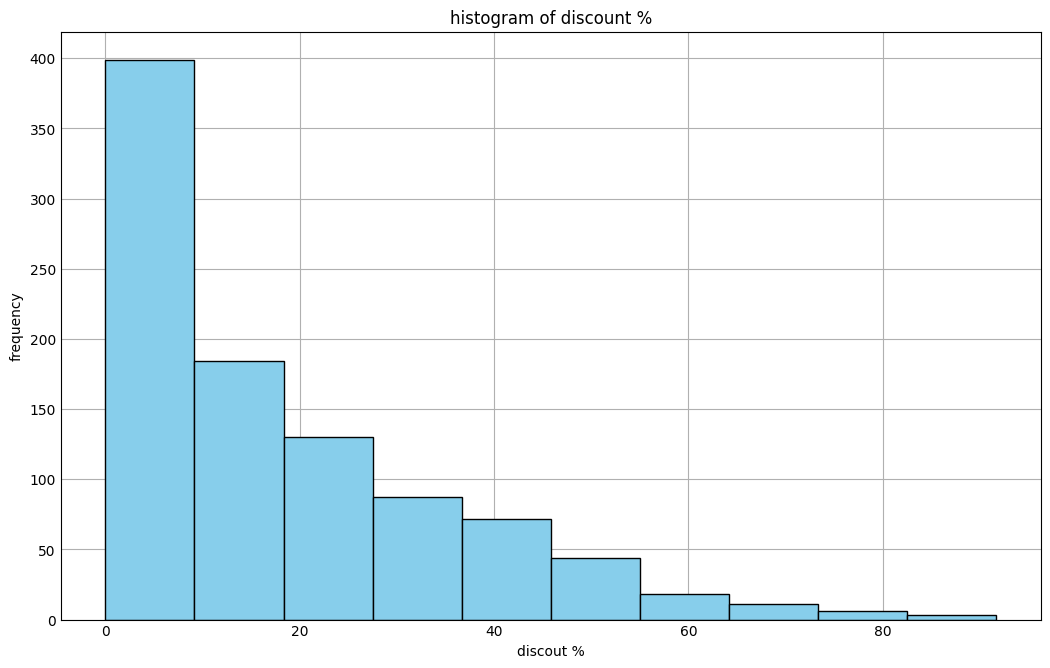

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['discount%'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('discout %')
plt.ylabel('frequency')
plt.title('histogram of discount %')
plt.grid(True)
plt.show()


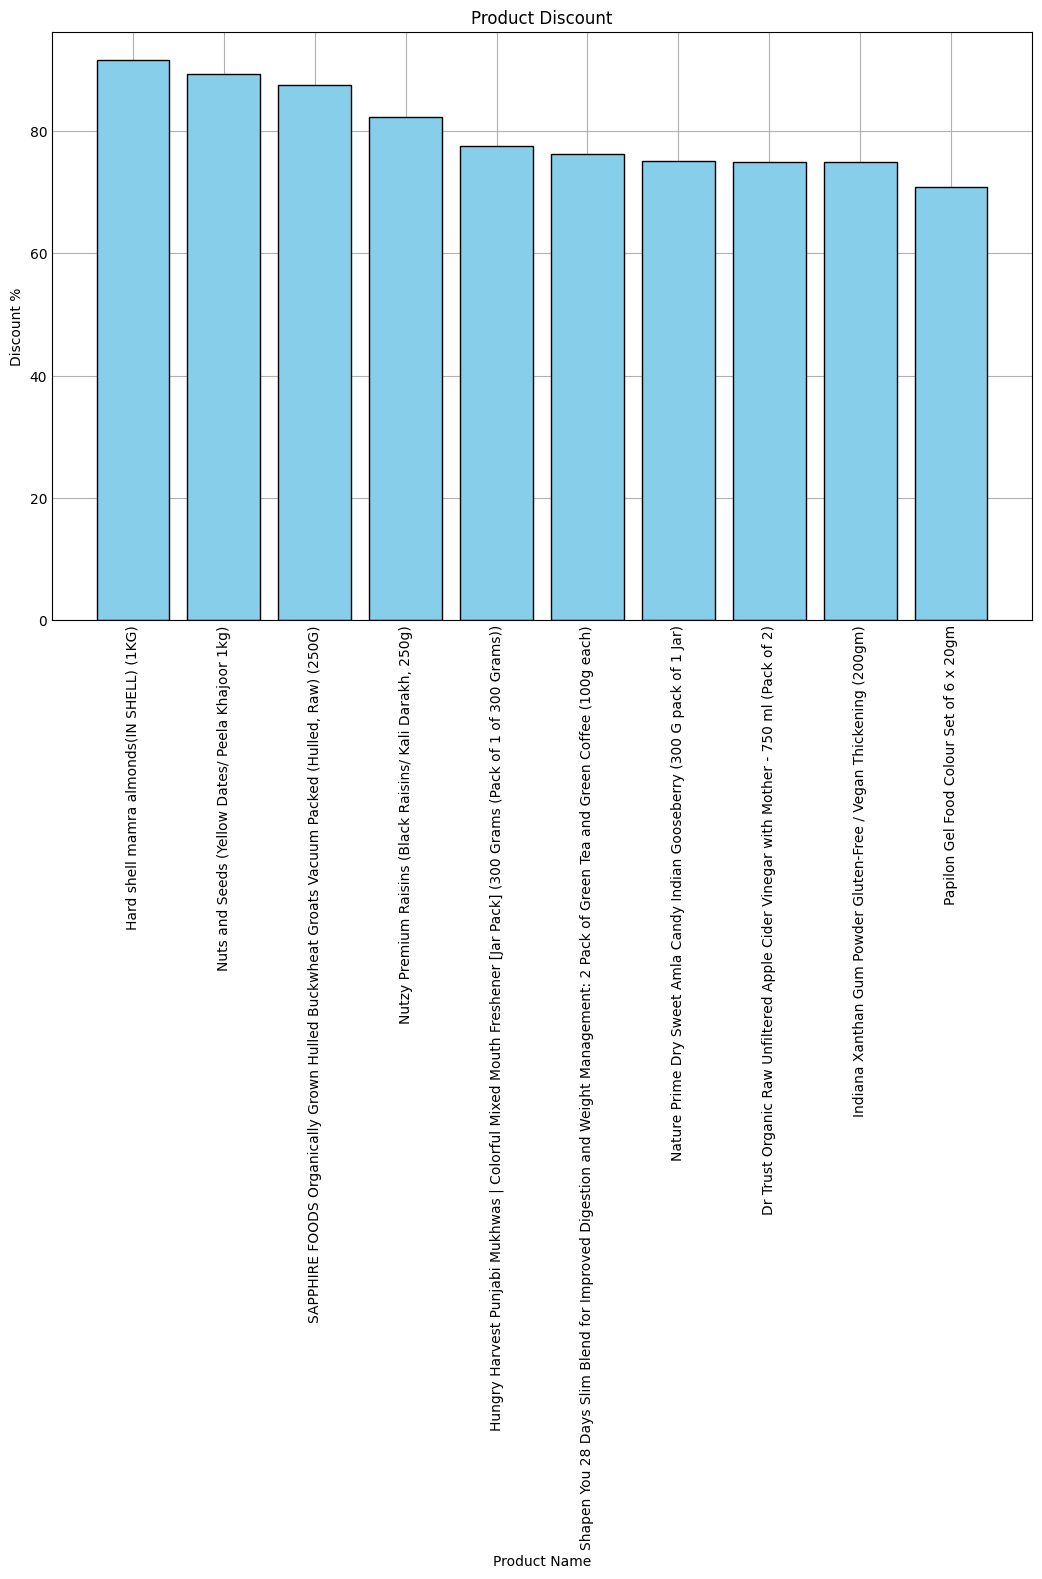

In [25]:
top_10_products = df.sort_values(by='discount%', ascending=False).head(10)
x=top_10_products['name']
y=top_10_products['discount%']
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black')
plt.xlabel('Product Name')
plt.ylabel('Discount %')
plt.title('Product Discount')
plt.xticks(rotation=90)
plt.show()

In [26]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount,discount%
0,Nutraj 100% Natural Dried Premium California W...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71f5UPOWDq...,https://www.amazon.in/Nutraj-California-Walnut...,3.9,6081.0,686.0,998.0,312.0,31.26
1,"Cadbury Bournvita 5 Star Magic Health Drink, 7...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/614FIW5c6H...,https://www.amazon.in/Bournvita-Magic-Chocolat...,4.3,8481.0,353.0,353.0,0.0,0.00
2,Sugar Free Green Natural Stevia Jar(200 g),grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/61rBhkTJ6E...,https://www.amazon.in/Sugarfree-Green-100-Natu...,4.3,1585.0,162.0,170.0,8.0,4.71
3,"Daawat Pulav, Long Grains, Fluffy Basmati for ...",grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/71UO6eXC1Q...,https://www.amazon.in/Daawat-Pulav-Basmati-Ric...,4.3,3907.0,138.0,139.0,1.0,0.72
4,Tata Tea Gold | Assam teas with Gently Rolled ...,grocery & gourmet foods,All Grocery & Gourmet Foods,https://m.media-amazon.com/images/I/51kEujuYlp...,https://www.amazon.in/Tata-Tea-Gold-500g/dp/B0...,4.4,15528.0,283.0,295.0,12.0,4.07
